In [3]:
import numpy as np
import matplotlib.pyplot as plt

V = 0.023 ##volume
m = 6.6e-26 #mass
h = 6.6e-34 ##planck constant
E = 1.6e-19 ##energy

def S_ex(N): ##exakte Formel
    res = N * np.log(V) + np.log(2*np.pi*m)+(3*N/2-1)*np.log(2*np.pi*m*E)
    fac1 = 0 ##logN!
    for i in range(1,N):
        fac1 += np.log(i)
    fac2 = 0 ##log(3N/2-1)!
    for i in range(1,int(3*N/2-1)):
        fac2 += np.log(i)
    res -= 3*N*np.log(h)
    res -= fac1
    res -= fac2
    return res

def S_st(N): ##Sackur Tetrode Formel
    res = N * np.log(V/N*(E/N)**(3/2)) + 3/2*N*(5/3+np.log(4*m*np.pi/(3*h**2)))
    return res

res_ex = np.array([])
res_st = np.array([])

N = np.arange(100,10000,10)
for n in N:
    res_ex = np.append(res_ex,S_ex(n))
    res_st = np.append(res_st,S_st(n))
    




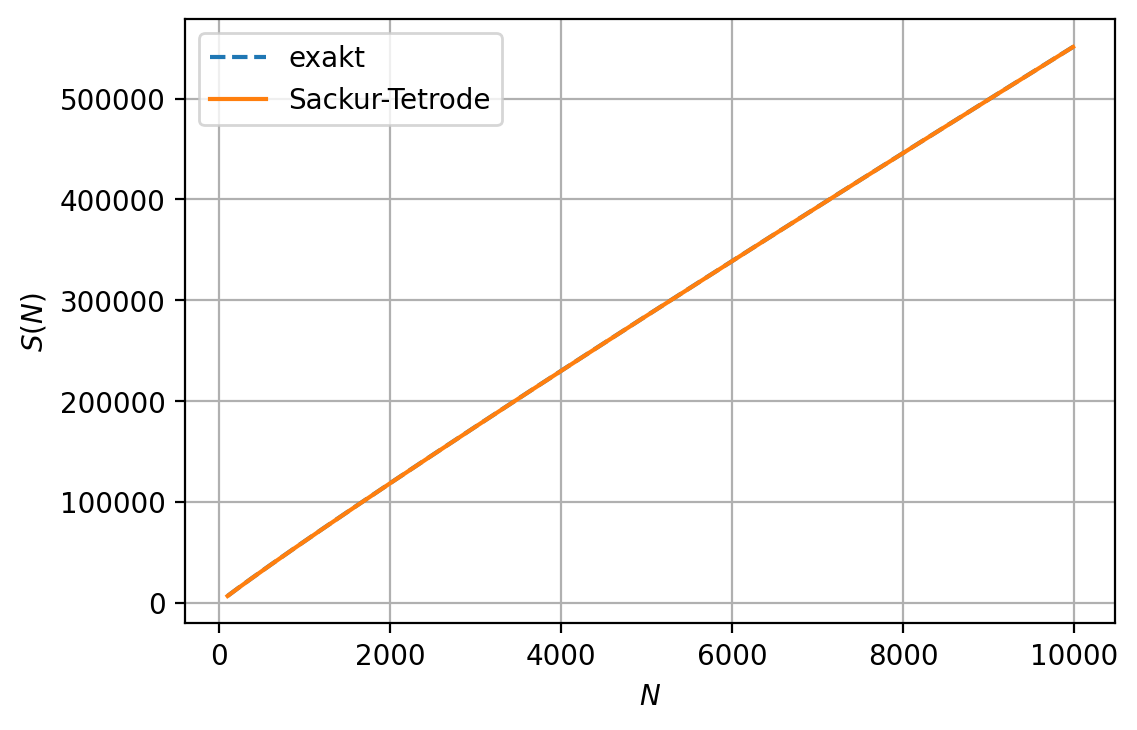

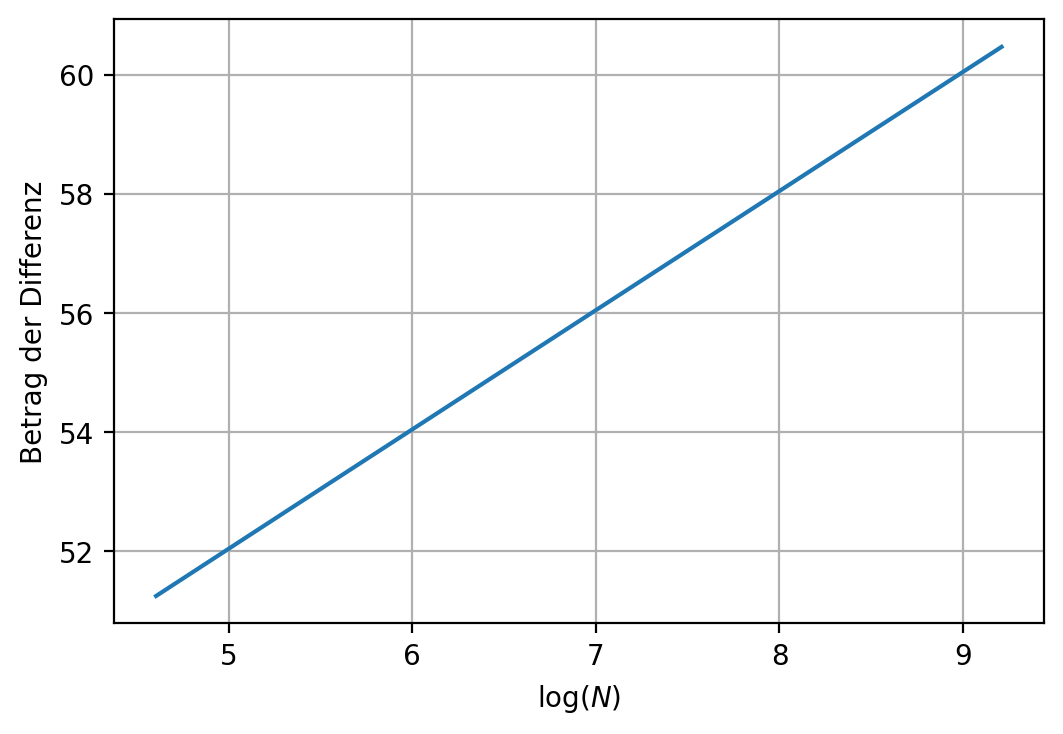

In [4]:
##Plot der Entropien
plt.figure(dpi=200)
plt.grid()
plt.xlabel("$N$")
plt.ylabel("$S(N)$")
plt.plot(N,res_ex,"--",label = "exakt")
plt.plot(N,res_st,label = "Sackur-Tetrode")
plt.legend(loc=0)
plt.savefig("entropy.pdf")

##Plot der differenzen
plt.figure(dpi=200)
plt.grid()
plt.xlabel("$\log(N)$")
plt.ylabel("Betrag der Differenz")
plt.plot(np.log(N),abs(res_ex-res_st))
plt.savefig("diff.pdf")